In [1]:
# Plotting notebook for the project
# Imports
import argparse
import os
import sys
import glob
import re

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from datetime import datetime
import scipy.stats as stats

# import cdo
from cdo import *
cdo = Cdo()

In [2]:
# Local imports
sys.path.append('/home/users/benhutch/skill-maps')
import dictionaries as dic
import functions as fnc

In [3]:
# Set up the variables for the multi-method seasonal plot
match_var = "tas"
region="global"
region_grid = dic.gridspec_global
season="DJFM"
forecast_range = "2-9"
start_year = "1960"
end_year = "2022" # shortened for test case

seasons_list_obs = dic.seasons_list_obs
seasons_list_model = dic.seasons_list_model
obs_path = dic.obs
models = dic.tas_models
base_dir = dic.base_dir
output_dir = dic.plots_dir
save_dir = dic.save_dir

method raw
obs season DJFM
mod season DJFM
Gridspec file: /home/users/benhutch/gridspec/gridspec-global.txt
Variable is not ua or va, creating new file name
File already exists
Loading ERA5 data
Dataset loaded:  [[[[244.69833 244.69833 244.69833 ... 244.69833 244.69833 244.69833]
   [243.98952 244.31924 244.6137  ... 243.28072 243.4782  243.7462 ]
   [251.60124 254.06972 254.60045 ... 251.7088  251.54306 251.9345 ]
   ...
   [247.25496 247.31139 247.20207 ... 246.92172 247.02046 247.10509]
   [246.12299 246.09302 246.05775 ... 246.36102 246.27638 246.24112]
   [245.3895  245.33836 245.29428 ... 245.57993 245.5235  245.45827]]

  [[      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   ...
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan       nan       nan ...       nan       nan       nan]
   [      nan

/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Observations annual mean anomalies: [[[ 2.544627    2.544627    2.544627   ...  2.544627    2.544627
    2.544627  ]
  [-0.71372986 -0.7210388  -0.7145793  ... -0.7600301  -0.73264056
   -0.72609967]
  [-0.94991046 -1.0395966  -1.1321716  ... -0.5277659  -0.39172363
   -0.45173135]
  ...
  [ 0.80899554  0.74846905  0.7157542  ...  0.866333    0.85510254
    0.8463847 ]
  [ 1.2041168   1.1921488   1.1981455  ...  1.1892954   1.1862946
    1.1975352 ]
  [ 0.9409841   0.91818744  0.8958842  ...  0.9363556   0.93674725
    0.9397685 ]]

 [[-1.5542246  -1.5542246  -1.5542246  ... -1.5542246  -1.5542246
   -1.5542246 ]
  [-1.2403412  -1.2053274  -1.1624298  ... -1.2701874  -1.274526
   -1.2485962 ]
  [-0.10240173 -0.2473348  -0.2153066  ... -0.13398743  0.17896526
    0.4433899 ]
  ...
  [-1.6283315  -1.6483103  -1.6310629  ... -1.5580597  -1.6116129
   -1.6168009 ]
  [-1.9085134  -1.9534048  -1.9744467  ... -1.9151102  -1.938085
   -1.9227346 ]
  [-2.7017872  -2.7463226  -2.7897847  ... -2.

/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Observations annual mean anomalies: [[[-1.34338892e+00 -1.34338892e+00 -1.34338892e+00 ... -1.34338892e+00
   -1.34338892e+00 -1.34338892e+00]
  [-1.85682678e+00 -1.78863013e+00 -1.71869409e+00 ... -1.92310083e+00
   -1.94514978e+00 -1.89570105e+00]
  [-6.10356629e-01 -1.07617188e+00 -5.59082031e-01 ... -5.06205261e-01
    3.42320770e-01  9.08060730e-01]
  ...
  [ 1.15946449e-01  1.31663010e-01  1.33951828e-01 ...  1.22365318e-01
    1.27950028e-01  1.28072098e-01]
  [ 9.57641602e-02  1.15783691e-01  1.13657631e-01 ...  9.43501815e-02
    9.85514298e-02  1.05458580e-01]
  [ 5.52368164e-02  4.24194336e-02  3.14432792e-02 ...  6.21032715e-02
    5.78816719e-02  5.69356270e-02]]

 [[-7.34497070e-01 -7.34497070e-01 -7.34497070e-01 ... -7.34497070e-01
   -7.34497070e-01 -7.34497070e-01]
  [-1.31904602e+00 -1.33255005e+00 -1.34665430e+00 ... -1.35476172e+00
   -1.32450354e+00 -1.32265723e+00]
  [-1.65416968e+00 -1.81084192e+00 -1.56410730e+00 ... -1.22089136e+00
   -1.32625329e+00 -1.5562998

/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Observations annual mean anomalies: [[[-1.63864136e+00 -1.63864136e+00 -1.63864136e+00 ... -1.63864136e+00
   -1.63864136e+00 -1.63864136e+00]
  [-1.48639929e+00 -1.50376892e+00 -1.51016748e+00 ... -1.49307764e+00
   -1.49384058e+00 -1.48694360e+00]
  [-1.66775513e+00 -1.66719055e+00 -1.55196631e+00 ... -1.59865820e+00
   -1.64919031e+00 -1.68426001e+00]
  ...
  [-4.42850739e-01 -3.77721161e-01 -3.44253540e-01 ... -7.28480041e-01
   -6.59703553e-01 -5.76990783e-01]
  [ 1.14827476e-01  1.71986893e-01  2.22290039e-01 ... -7.68890381e-02
   -7.11059570e-03  5.52062988e-02]
  [ 8.42183456e-02  9.42738876e-02  1.03622437e-01 ... -1.95109043e-02
    3.00089509e-04  4.09037285e-02]]

 [[ 6.77612305e-01  6.77612305e-01  6.77612305e-01 ...  6.77612305e-01
    6.77612305e-01  6.77612305e-01]
  [ 7.84016907e-01  7.61947632e-01  7.46724427e-01 ...  7.93197632e-01
    7.88319886e-01  7.88177490e-01]
  [ 6.81406677e-01  5.22705078e-01  6.16765320e-01 ...  6.58233643e-01
    4.82513428e-01  3.1108602

/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Observations annual mean anomalies: [[[-0.21739578 -0.21739578 -0.21739578 ... -0.21739578 -0.21739578
   -0.21739578]
  [-0.32284546 -0.32772827 -0.33145905 ... -0.25510406 -0.28660965
   -0.30678177]
  [-0.44639587 -0.33480453 -0.5892792  ... -0.41220093 -0.5180969
   -0.46297836]
  ...
  [-2.1218262  -2.1203804  -2.1024857  ... -2.0699997  -2.1310196
   -2.140442  ]
  [-2.6803741  -2.636322   -2.5949936  ... -2.761341   -2.7539177
   -2.7072487 ]
  [-3.8116493  -3.8082542  -3.8065414  ... -3.849392   -3.8425026
   -3.8276062 ]]

 [[-1.2964668  -1.2964668  -1.2964668  ... -1.2964668  -1.2964668
   -1.2964668 ]
  [-0.68385696 -0.67022705 -0.6554413  ... -0.75011826 -0.72608566
   -0.70174026]
  [ 0.45989227  0.26864243  0.22927856 ...  0.43589783  0.37143707
    0.37366104]
  ...
  [-3.031643   -3.028431   -3.0202293  ... -3.2077026  -3.1607285
   -3.0868378 ]
  [-3.9846992  -3.967537   -3.94516    ... -3.9999886  -4.0057907
   -3.9798355 ]
  [-4.50811    -4.4901733  -4.473915   ... -

/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Observations annual mean anomalies: [[[ 2.544627    2.544627    2.544627   ...  2.544627    2.544627
    2.544627  ]
  [-0.71372986 -0.7210388  -0.7145793  ... -0.7600301  -0.73264056
   -0.72609967]
  [-0.94991046 -1.0395966  -1.1321716  ... -0.5277659  -0.39172363
   -0.45173135]
  ...
  [ 0.80899554  0.74846905  0.7157542  ...  0.866333    0.85510254
    0.8463847 ]
  [ 1.2041168   1.1921488   1.1981455  ...  1.1892954   1.1862946
    1.1975352 ]
  [ 0.9409841   0.91818744  0.8958842  ...  0.9363556   0.93674725
    0.9397685 ]]

 [[-1.5542246  -1.5542246  -1.5542246  ... -1.5542246  -1.5542246
   -1.5542246 ]
  [-1.2403412  -1.2053274  -1.1624298  ... -1.2701874  -1.274526
   -1.2485962 ]
  [-0.10240173 -0.2473348  -0.2153066  ... -0.13398743  0.17896526
    0.4433899 ]
  ...
  [-1.6283315  -1.6483103  -1.6310629  ... -1.5580597  -1.6116129
   -1.6168009 ]
  [-1.9085134  -1.9534048  -1.9744467  ... -1.9151102  -1.938085
   -1.9227346 ]
  [-2.7017872  -2.7463226  -2.7897847  ... -2.

/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Observations annual mean anomalies: [[[-1.63864136e+00 -1.63864136e+00 -1.63864136e+00 ... -1.63864136e+00
   -1.63864136e+00 -1.63864136e+00]
  [-1.48639929e+00 -1.50376892e+00 -1.51016748e+00 ... -1.49307764e+00
   -1.49384058e+00 -1.48694360e+00]
  [-1.66775513e+00 -1.66719055e+00 -1.55196631e+00 ... -1.59865820e+00
   -1.64919031e+00 -1.68426001e+00]
  ...
  [-4.42850739e-01 -3.77721161e-01 -3.44253540e-01 ... -7.28480041e-01
   -6.59703553e-01 -5.76990783e-01]
  [ 1.14827476e-01  1.71986893e-01  2.22290039e-01 ... -7.68890381e-02
   -7.11059570e-03  5.52062988e-02]
  [ 8.42183456e-02  9.42738876e-02  1.03622437e-01 ... -1.95109043e-02
    3.00089509e-04  4.09037285e-02]]

 [[ 6.77612305e-01  6.77612305e-01  6.77612305e-01 ...  6.77612305e-01
    6.77612305e-01  6.77612305e-01]
  [ 7.84016907e-01  7.61947632e-01  7.46724427e-01 ...  7.93197632e-01
    7.88319886e-01  7.88177490e-01]
  [ 6.81406677e-01  5.22705078e-01  6.16765320e-01 ...  6.58233643e-01
    4.82513428e-01  3.1108602

/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Observations annual mean anomalies: [[[-0.21739578 -0.21739578 -0.21739578 ... -0.21739578 -0.21739578
   -0.21739578]
  [-0.32284546 -0.32772827 -0.33145905 ... -0.25510406 -0.28660965
   -0.30678177]
  [-0.44639587 -0.33480453 -0.5892792  ... -0.41220093 -0.5180969
   -0.46297836]
  ...
  [-2.1218262  -2.1203804  -2.1024857  ... -2.0699997  -2.1310196
   -2.140442  ]
  [-2.6803741  -2.636322   -2.5949936  ... -2.761341   -2.7539177
   -2.7072487 ]
  [-3.8116493  -3.8082542  -3.8065414  ... -3.849392   -3.8425026
   -3.8276062 ]]

 [[-1.2964668  -1.2964668  -1.2964668  ... -1.2964668  -1.2964668
   -1.2964668 ]
  [-0.68385696 -0.67022705 -0.6554413  ... -0.75011826 -0.72608566
   -0.70174026]
  [ 0.45989227  0.26864243  0.22927856 ...  0.43589783  0.37143707
    0.37366104]
  ...
  [-3.031643   -3.028431   -3.0202293  ... -3.2077026  -3.1607285
   -3.0868378 ]
  [-3.9846992  -3.967537   -3.94516    ... -3.9999886  -4.0057907
   -3.9798355 ]
  [-4.50811    -4.4901733  -4.473915   ... -

/opt/jaspy/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


Time dimension of obs: ['1960-12-31T00:00:00.000000000' '1961-12-31T00:00:00.000000000'
 '1962-12-31T00:00:00.000000000' '1963-12-31T00:00:00.000000000'
 '1964-12-31T00:00:00.000000000' '1965-12-31T00:00:00.000000000'
 '1966-12-31T00:00:00.000000000' '1967-12-31T00:00:00.000000000'
 '1968-12-31T00:00:00.000000000' '1969-12-31T00:00:00.000000000'
 '1970-12-31T00:00:00.000000000' '1971-12-31T00:00:00.000000000'
 '1972-12-31T00:00:00.000000000' '1973-12-31T00:00:00.000000000'
 '1974-12-31T00:00:00.000000000' '1975-12-31T00:00:00.000000000'
 '1976-12-31T00:00:00.000000000' '1977-12-31T00:00:00.000000000'
 '1978-12-31T00:00:00.000000000' '1979-12-31T00:00:00.000000000'
 '1980-12-31T00:00:00.000000000' '1981-12-31T00:00:00.000000000'
 '1982-12-31T00:00:00.000000000' '1983-12-31T00:00:00.000000000'
 '1984-12-31T00:00:00.000000000' '1985-12-31T00:00:00.000000000'
 '1986-12-31T00:00:00.000000000' '1987-12-31T00:00:00.000000000'
 '1988-12-31T00:00:00.000000000' '1989-12-31T00:00:00.000000000'
 '

/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Calculating model NAO index using default definition
calculated NAO for model CMCC-CM2-SR5 member r1i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CMCC-CM2-SR5 member r9i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CMCC-CM2-SR5 member r2i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CMCC-CM2-SR5 member r3i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CMCC-CM2-SR5 member r4i1p1f1
Calculating model NAO index using default definition
calculated NAO for model HadGEM3-GC31-MM member r4i1p1f2
Calculating model NAO index using default definition
calculated NAO for model HadGEM3-GC31-MM member r3i1p1f2
Calculating model NAO index using default definition
calculated NAO for model HadGEM3-GC31-MM member r8i1p1f2
Calculating model NAO index using default definition
calculated NAO for model HadGEM3-GC31-MM member r1i1p1f2
Calculating model NAO ind

/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Number of ensemble members: 160
Number of years: 53
Converting obs_nao to a numpy array
Rescaling NAO indices for 1969
Cross-validation case for the first year
Removing the first year and: 1 years forward
Cross-validation indices: [0 1]
Rescaling NAO indices for 1970
Cross-validation case for any other year
Removing the year and: 1 years backward
Cross-validation indices: [0 1 2]
Rescaling NAO indices for 1971
Cross-validation case for any other year
Removing the year and: 1 years backward
Cross-validation indices: [1 2 3]
Rescaling NAO indices for 1972
Cross-validation case for any other year
Removing the year and: 1 years backward
Cross-validation indices: [2 3 4]
Rescaling NAO indices for 1973
Cross-validation case for any other year
Removing the year and: 1 years backward
Cross-validation indices: [3 4 5]
Rescaling NAO indices for 1974
Cross-validation case for any other year
Removing the year and: 1 years backward
Cross-validation indices: [4 5 6]
Rescaling NAO indices for 1975
Cr

/opt/jaspy/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Time dimension of obs: ['1960-12-31T00:00:00.000000000' '1961-12-31T00:00:00.000000000'
 '1962-12-31T00:00:00.000000000' '1963-12-31T00:00:00.000000000'
 '1964-12-31T00:00:00.000000000' '1965-12-31T00:00:00.000000000'
 '1966-12-31T00:00:00.000000000' '1967-12-31T00:00:00.000000000'
 '1968-12-31T00:00:00.000000000' '1969-12-31T00:00:00.000000000'
 '1970-12-31T00:00:00.000000000' '1971-12-31T00:00:00.000000000'
 '1972-12-31T00:00:00.000000000' '1973-12-31T00:00:00.000000000'
 '1974-12-31T00:00:00.000000000' '1975-12-31T00:00:00.000000000'
 '1976-12-31T00:00:00.000000000' '1977-12-31T00:00:00.000000000'
 '1978-12-31T00:00:00.000000000' '1979-12-31T00:00:00.000000000'
 '1980-12-31T00:00:00.000000000' '1981-12-31T00:00:00.000000000'
 '1982-12-31T00:00:00.000000000' '1983-12-31T00:00:00.000000000'
 '1984-12-31T00:00:00.000000000' '1985-12-31T00:00:00.000000000'
 '1986-12-31T00:00:00.000000000' '1987-12-31T00:00:00.000000000'
 '1988-12-31T00:00:00.000000000' '1989-12-31T00:00:00.000000000'
 '

/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Observations annual mean anomalies: [[[ 2.544627    2.544627    2.544627   ...  2.544627    2.544627
    2.544627  ]
  [-0.71372986 -0.7210388  -0.7145793  ... -0.7600301  -0.73264056
   -0.72609967]
  [-0.94991046 -1.0395966  -1.1321716  ... -0.5277659  -0.39172363
   -0.45173135]
  ...
  [ 0.80899554  0.74846905  0.7157542  ...  0.866333    0.85510254
    0.8463847 ]
  [ 1.2041168   1.1921488   1.1981455  ...  1.1892954   1.1862946
    1.1975352 ]
  [ 0.9409841   0.91818744  0.8958842  ...  0.9363556   0.93674725
    0.9397685 ]]

 [[-1.5542246  -1.5542246  -1.5542246  ... -1.5542246  -1.5542246
   -1.5542246 ]
  [-1.2403412  -1.2053274  -1.1624298  ... -1.2701874  -1.274526
   -1.2485962 ]
  [-0.10240173 -0.2473348  -0.2153066  ... -0.13398743  0.17896526
    0.4433899 ]
  ...
  [-1.6283315  -1.6483103  -1.6310629  ... -1.5580597  -1.6116129
   -1.6168009 ]
  [-1.9085134  -1.9534048  -1.9744467  ... -1.9151102  -1.938085
   -1.9227346 ]
  [-2.7017872  -2.7463226  -2.7897847  ... -2.

/opt/jaspy/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Time dimension of obs: ['1961-12-31T00:00:00.000000000' '1962-12-31T00:00:00.000000000'
 '1963-12-31T00:00:00.000000000' '1964-12-31T00:00:00.000000000'
 '1965-12-31T00:00:00.000000000' '1966-12-31T00:00:00.000000000'
 '1967-12-31T00:00:00.000000000' '1968-12-31T00:00:00.000000000'
 '1969-12-31T00:00:00.000000000' '1970-12-31T00:00:00.000000000'
 '1971-12-31T00:00:00.000000000' '1972-12-31T00:00:00.000000000'
 '1973-12-31T00:00:00.000000000' '1974-12-31T00:00:00.000000000'
 '1975-12-31T00:00:00.000000000' '1976-12-31T00:00:00.000000000'
 '1977-12-31T00:00:00.000000000' '1978-12-31T00:00:00.000000000'
 '1979-12-31T00:00:00.000000000' '1980-12-31T00:00:00.000000000'
 '1981-12-31T00:00:00.000000000' '1982-12-31T00:00:00.000000000'
 '1983-12-31T00:00:00.000000000' '1984-12-31T00:00:00.000000000'
 '1985-12-31T00:00:00.000000000' '1986-12-31T00:00:00.000000000'
 '1987-12-31T00:00:00.000000000' '1988-12-31T00:00:00.000000000'
 '1989-12-31T00:00:00.000000000' '1990-12-31T00:00:00.000000000'
 '

/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Calculating model NAO index using default definition
calculated NAO for model MPI-ESM1-2-LR member r11i1p1f1
Calculating model NAO index using default definition
calculated NAO for model MPI-ESM1-2-LR member r13i1p1f1
Calculating model NAO index using default definition
calculated NAO for model MPI-ESM1-2-LR member r14i1p1f1
Calculating model NAO index using default definition
calculated NAO for model MPI-ESM1-2-LR member r16i1p1f1
Calculating model NAO index using default definition
calculated NAO for model MPI-ESM1-2-LR member r15i1p1f1
Calculating model NAO index using default definition
calculated NAO for model FGOALS-f3-L member r8i1p1f1
Calculating model NAO index using default definition
calculated NAO for model FGOALS-f3-L member r7i1p1f1
Calculating model NAO index using default definition
calculated NAO for model FGOALS-f3-L member r9i1p1f1
Calculating model NAO index using default definition
calculated NAO for model MIROC6 member r9i1p1f1
Calculating model NAO index using de

/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Calculating model NAO index using default definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r5i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r10i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r4i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r15i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r14i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r26i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r28i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r27i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CESM1-1-CAM5

/opt/jaspy/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


Time dimension of obs: ['1961-12-31T00:00:00.000000000' '1962-12-31T00:00:00.000000000'
 '1963-12-31T00:00:00.000000000' '1964-12-31T00:00:00.000000000'
 '1965-12-31T00:00:00.000000000' '1966-12-31T00:00:00.000000000'
 '1967-12-31T00:00:00.000000000' '1968-12-31T00:00:00.000000000'
 '1969-12-31T00:00:00.000000000' '1970-12-31T00:00:00.000000000'
 '1971-12-31T00:00:00.000000000' '1972-12-31T00:00:00.000000000'
 '1973-12-31T00:00:00.000000000' '1974-12-31T00:00:00.000000000'
 '1975-12-31T00:00:00.000000000' '1976-12-31T00:00:00.000000000'
 '1977-12-31T00:00:00.000000000' '1978-12-31T00:00:00.000000000'
 '1979-12-31T00:00:00.000000000' '1980-12-31T00:00:00.000000000'
 '1981-12-31T00:00:00.000000000' '1982-12-31T00:00:00.000000000'
 '1983-12-31T00:00:00.000000000' '1984-12-31T00:00:00.000000000'
 '1985-12-31T00:00:00.000000000' '1986-12-31T00:00:00.000000000'
 '1987-12-31T00:00:00.000000000' '1988-12-31T00:00:00.000000000'
 '1989-12-31T00:00:00.000000000' '1990-12-31T00:00:00.000000000'
 '

/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Observations annual mean anomalies: [[[-1.34338892e+00 -1.34338892e+00 -1.34338892e+00 ... -1.34338892e+00
   -1.34338892e+00 -1.34338892e+00]
  [-1.85682678e+00 -1.78863013e+00 -1.71869409e+00 ... -1.92310083e+00
   -1.94514978e+00 -1.89570105e+00]
  [-6.10356629e-01 -1.07617188e+00 -5.59082031e-01 ... -5.06205261e-01
    3.42320770e-01  9.08060730e-01]
  ...
  [ 1.15946449e-01  1.31663010e-01  1.33951828e-01 ...  1.22365318e-01
    1.27950028e-01  1.28072098e-01]
  [ 9.57641602e-02  1.15783691e-01  1.13657631e-01 ...  9.43501815e-02
    9.85514298e-02  1.05458580e-01]
  [ 5.52368164e-02  4.24194336e-02  3.14432792e-02 ...  6.21032715e-02
    5.78816719e-02  5.69356270e-02]]

 [[-7.34497070e-01 -7.34497070e-01 -7.34497070e-01 ... -7.34497070e-01
   -7.34497070e-01 -7.34497070e-01]
  [-1.31904602e+00 -1.33255005e+00 -1.34665430e+00 ... -1.35476172e+00
   -1.32450354e+00 -1.32265723e+00]
  [-1.65416968e+00 -1.81084192e+00 -1.56410730e+00 ... -1.22089136e+00
   -1.32625329e+00 -1.5562998

/opt/jaspy/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


Time dimension of obs: ['1961-12-31T00:00:00.000000000' '1962-12-31T00:00:00.000000000'
 '1963-12-31T00:00:00.000000000' '1964-12-31T00:00:00.000000000'
 '1965-12-31T00:00:00.000000000' '1966-12-31T00:00:00.000000000'
 '1967-12-31T00:00:00.000000000' '1968-12-31T00:00:00.000000000'
 '1969-12-31T00:00:00.000000000' '1970-12-31T00:00:00.000000000'
 '1971-12-31T00:00:00.000000000' '1972-12-31T00:00:00.000000000'
 '1973-12-31T00:00:00.000000000' '1974-12-31T00:00:00.000000000'
 '1975-12-31T00:00:00.000000000' '1976-12-31T00:00:00.000000000'
 '1977-12-31T00:00:00.000000000' '1978-12-31T00:00:00.000000000'
 '1979-12-31T00:00:00.000000000' '1980-12-31T00:00:00.000000000'
 '1981-12-31T00:00:00.000000000' '1982-12-31T00:00:00.000000000'
 '1983-12-31T00:00:00.000000000' '1984-12-31T00:00:00.000000000'
 '1985-12-31T00:00:00.000000000' '1986-12-31T00:00:00.000000000'
 '1987-12-31T00:00:00.000000000' '1988-12-31T00:00:00.000000000'
 '1989-12-31T00:00:00.000000000' '1990-12-31T00:00:00.000000000'
 '

/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Calculating model NAO index using SNAO definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r27i1p1f1
Calculating model NAO index using SNAO definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r33i1p1f1
Calculating model NAO index using SNAO definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r32i1p1f1
Calculating model NAO index using SNAO definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r34i1p1f1
Calculating model NAO index using SNAO definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r36i1p1f1
Calculating model NAO index using SNAO definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r39i1p1f1
Calculating model NAO index using SNAO definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r38i1p1f1
Calculating model NAO index using SNAO definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r35i1p1f1
Calculating model NAO index using SNAO definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r37i1p1f1
C

/opt/jaspy/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


Time dimension of obs: ['1961-12-31T00:00:00.000000000' '1962-12-31T00:00:00.000000000'
 '1963-12-31T00:00:00.000000000' '1964-12-31T00:00:00.000000000'
 '1965-12-31T00:00:00.000000000' '1966-12-31T00:00:00.000000000'
 '1967-12-31T00:00:00.000000000' '1968-12-31T00:00:00.000000000'
 '1969-12-31T00:00:00.000000000' '1970-12-31T00:00:00.000000000'
 '1971-12-31T00:00:00.000000000' '1972-12-31T00:00:00.000000000'
 '1973-12-31T00:00:00.000000000' '1974-12-31T00:00:00.000000000'
 '1975-12-31T00:00:00.000000000' '1976-12-31T00:00:00.000000000'
 '1977-12-31T00:00:00.000000000' '1978-12-31T00:00:00.000000000'
 '1979-12-31T00:00:00.000000000' '1980-12-31T00:00:00.000000000'
 '1981-12-31T00:00:00.000000000' '1982-12-31T00:00:00.000000000'
 '1983-12-31T00:00:00.000000000' '1984-12-31T00:00:00.000000000'
 '1985-12-31T00:00:00.000000000' '1986-12-31T00:00:00.000000000'
 '1987-12-31T00:00:00.000000000' '1988-12-31T00:00:00.000000000'
 '1989-12-31T00:00:00.000000000' '1990-12-31T00:00:00.000000000'
 '

/opt/jaspy/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


Time dimension of obs: ['1961-12-31T00:00:00.000000000' '1962-12-31T00:00:00.000000000'
 '1963-12-31T00:00:00.000000000' '1964-12-31T00:00:00.000000000'
 '1965-12-31T00:00:00.000000000' '1966-12-31T00:00:00.000000000'
 '1967-12-31T00:00:00.000000000' '1968-12-31T00:00:00.000000000'
 '1969-12-31T00:00:00.000000000' '1970-12-31T00:00:00.000000000'
 '1971-12-31T00:00:00.000000000' '1972-12-31T00:00:00.000000000'
 '1973-12-31T00:00:00.000000000' '1974-12-31T00:00:00.000000000'
 '1975-12-31T00:00:00.000000000' '1976-12-31T00:00:00.000000000'
 '1977-12-31T00:00:00.000000000' '1978-12-31T00:00:00.000000000'
 '1979-12-31T00:00:00.000000000' '1980-12-31T00:00:00.000000000'
 '1981-12-31T00:00:00.000000000' '1982-12-31T00:00:00.000000000'
 '1983-12-31T00:00:00.000000000' '1984-12-31T00:00:00.000000000'
 '1985-12-31T00:00:00.000000000' '1986-12-31T00:00:00.000000000'
 '1987-12-31T00:00:00.000000000' '1988-12-31T00:00:00.000000000'
 '1989-12-31T00:00:00.000000000' '1990-12-31T00:00:00.000000000'
 '

/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Calculating model NAO index using default definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r22i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r37i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r36i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r38i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r39i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r40i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r13i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CESM1-1-CAM5-CMIP5 member r6i1p1f1
Calculating model NAO index using default definition
calculated NAO for model CESM1-1-CAM

/opt/jaspy/lib/python3.10/site-packages/iris/coords.py:2220: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/opt/jaspy/lib/python3.10/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Time dimension of obs: ['1961-12-31T00:00:00.000000000' '1962-12-31T00:00:00.000000000'
 '1963-12-31T00:00:00.000000000' '1964-12-31T00:00:00.000000000'
 '1965-12-31T00:00:00.000000000' '1966-12-31T00:00:00.000000000'
 '1967-12-31T00:00:00.000000000' '1968-12-31T00:00:00.000000000'
 '1969-12-31T00:00:00.000000000' '1970-12-31T00:00:00.000000000'
 '1971-12-31T00:00:00.000000000' '1972-12-31T00:00:00.000000000'
 '1973-12-31T00:00:00.000000000' '1974-12-31T00:00:00.000000000'
 '1975-12-31T00:00:00.000000000' '1976-12-31T00:00:00.000000000'
 '1977-12-31T00:00:00.000000000' '1978-12-31T00:00:00.000000000'
 '1979-12-31T00:00:00.000000000' '1980-12-31T00:00:00.000000000'
 '1981-12-31T00:00:00.000000000' '1982-12-31T00:00:00.000000000'
 '1983-12-31T00:00:00.000000000' '1984-12-31T00:00:00.000000000'
 '1985-12-31T00:00:00.000000000' '1986-12-31T00:00:00.000000000'
 '1987-12-31T00:00:00.000000000' '1988-12-31T00:00:00.000000000'
 '1989-12-31T00:00:00.000000000' '1990-12-31T00:00:00.000000000'
 '

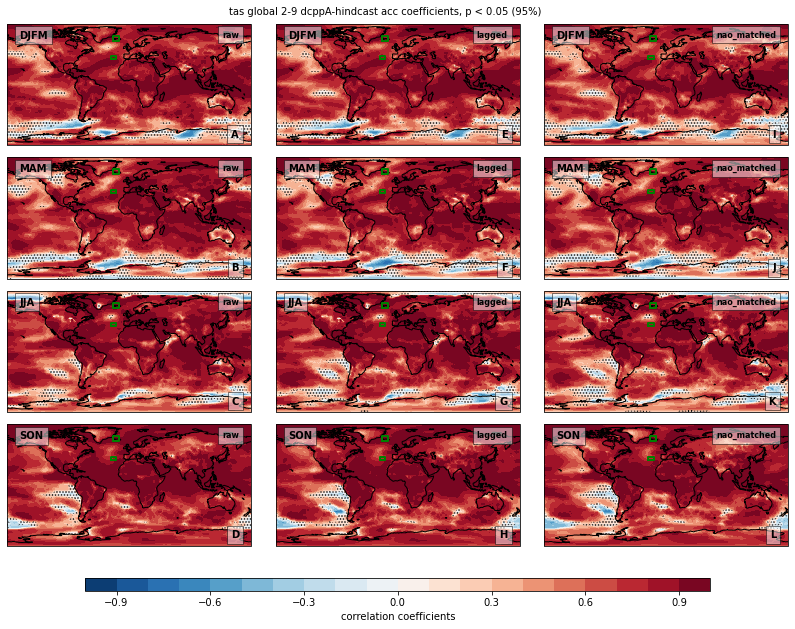

In [4]:
# Call the function
fnc.plot_seasonal_correlations_raw_lagged_matched(models, obs_path, match_var, match_var,
                                                    obs_path, region, region_grid, forecast_range,
                                                        start_year, end_year, seasons_list_obs, seasons_list_model,
                                                            output_dir, save_dir, match_var, dic.azores_grid_corrected, dic.iceland_grid_corrected,
                                                                p_sig=0.05, lag=4, no_subset_members=20, measure='acc')

In [ ]:
# Call the function
fnc.plot_seasonal_correlations_raw_lagged_matched(models, obs_path, match_var, match_var,
                                                    obs_path, region, region_grid, forecast_range,
                                                        start_year, end_year, seasons_list_obs, seasons_list_model,
                                                            output_dir, save_dir, match_var, dic.azores_grid_corrected, dic.iceland_grid_corrected,
                                                                p_sig=0.05, lag=4, no_subset_members=20, measure='acc', north_atlantic=True)

In [ ]:
# Call the function
fnc.plot_seasonal_correlations_raw_lagged_matched(models, obs_path, match_var, match_var,
                                                    obs_path, region, region_grid, forecast_range,
                                                        start_year, end_year, seasons_list_obs, seasons_list_model,
                                                            output_dir, save_dir, match_var, dic.azores_grid_corrected, dic.iceland_grid_corrected,
                                                                p_sig=0.05, lag=4, no_subset_members=20, measure='msss', north_atlantic=True)

In [ ]:
# Call the function
fnc.plot_seasonal_correlations_raw_lagged_matched(models, obs_path, match_var, match_var,
                                                    obs_path, region, region_grid, forecast_range,
                                                        start_year, end_year, seasons_list_obs, seasons_list_model,
                                                            output_dir, save_dir, match_var, dic.azores_grid_corrected, dic.iceland_grid_corrected,
                                                                p_sig=0.05, lag=4, no_subset_members=20, measure='rpc', north_atlantic=True)

In [ ]:
# Set up the variables for the multi-method seasonal plot
match_var = "rsds"
region="global"
region_grid = dic.gridspec_global
season="DJFM"
forecast_range = "2-9"
start_year = "1960"
end_year = "2022" # shortened for test case
seasons_list_obs = dic.seasons_list_obs
seasons_list_model = dic.seasons_list_model
obs_path = dic.obs
models = dic.rsds_models_noCMCC
base_dir = dic.base_dir
output_dir = dic.plots_dir
save_dir = dic.save_dir

In [ ]:
# Now call the function
fnc.plot_seasonal_correlations_raw_lagged_matched(models, obs_path, match_var, match_var,
                                                    obs_path, region, region_grid, forecast_range,
                                                        start_year, end_year, seasons_list_obs, seasons_list_model,
                                                            output_dir, save_dir, match_var, dic.azores_grid_corrected, dic.iceland_grid_corrected,
                                                                p_sig=0.05, lag=4, no_subset_members=20, measure='rpc')

In [ ]:
# Now call the function
fnc.plot_seasonal_correlations_raw_lagged_matched(models, obs_path, match_var, match_var,
                                                    obs_path, region, region_grid, forecast_range,
                                                        start_year, end_year, seasons_list_obs, seasons_list_model,
                                                            output_dir, save_dir, match_var, dic.azores_grid_corrected, dic.iceland_grid_corrected,
                                                                p_sig=0.05, lag=4, no_subset_members=20, measure='acc', north_atlantic=True)

In [ ]:
# Now call the function
fnc.plot_seasonal_correlations_raw_lagged_matched(models, obs_path, match_var, match_var,
                                                    obs_path, region, region_grid, forecast_range,
                                                        start_year, end_year, seasons_list_obs, seasons_list_model,
                                                            output_dir, save_dir, match_var, dic.azores_grid_corrected, dic.iceland_grid_corrected,
                                                                p_sig=0.05, lag=4, no_subset_members=20, measure='msss', north_atlantic=True)

In [ ]:
# Now call the function
fnc.plot_seasonal_correlations_raw_lagged_matched(models, obs_path, match_var, match_var,
                                                    obs_path, region, region_grid, forecast_range,
                                                        start_year, end_year, seasons_list_obs, seasons_list_model,
                                                            output_dir, save_dir, match_var, dic.azores_grid_corrected, dic.iceland_grid_corrected,
                                                                p_sig=0.05, lag=4, no_subset_members=20, measure='rpc', north_atlantic=True)

In [ ]:
# Now for the sfcWind fields
match_var = "sfcWind"
region="global"
region_grid = dic.gridspec_global
season="DJFM"
forecast_range = "2-9"
start_year = "1960"
end_year = "2022" # shortened for test case
seasons_list_obs = dic.seasons_list_obs
seasons_list_model = dic.seasons_list_model
obs_path = dic.obs
models = dic.sfcWind_models
base_dir = dic.base_dir
output_dir = dic.plots_dir
save_dir = dic.save_dir

In [ ]:
# Call the function to plot the correlations
fnc.plot_seasonal_correlations_raw_lagged_matched(models, obs_path, match_var, match_var,
                                                    obs_path, region, region_grid, forecast_range,
                                                        start_year, end_year, seasons_list_obs, seasons_list_model,
                                                            output_dir, save_dir, match_var, dic.azores_grid_corrected, dic.iceland_grid_corrected,
                                                                p_sig=0.05, lag=4, no_subset_members=20, measure='rpc')

In [ ]:
# Now call the function
fnc.plot_seasonal_correlations_raw_lagged_matched(models, obs_path, match_var, match_var,
                                                    obs_path, region, region_grid, forecast_range,
                                                        start_year, end_year, seasons_list_obs, seasons_list_model,
                                                            output_dir, save_dir, match_var, dic.azores_grid_corrected, dic.iceland_grid_corrected,
                                                                p_sig=0.05, lag=4, no_subset_members=20, measure='acc', north_atlantic=True)

In [ ]:
# Now call the function
fnc.plot_seasonal_correlations_raw_lagged_matched(models, obs_path, match_var, match_var,
                                                    obs_path, region, region_grid, forecast_range,
                                                        start_year, end_year, seasons_list_obs, seasons_list_model,
                                                            output_dir, save_dir, match_var, dic.azores_grid_corrected, dic.iceland_grid_corrected,
                                                                p_sig=0.05, lag=4, no_subset_members=20, measure='msss', north_atlantic=True)

In [ ]:
# Now call the function
fnc.plot_seasonal_correlations_raw_lagged_matched(models, obs_path, match_var, match_var,
                                                    obs_path, region, region_grid, forecast_range,
                                                        start_year, end_year, seasons_list_obs, seasons_list_model,
                                                            output_dir, save_dir, match_var, dic.azores_grid_corrected, dic.iceland_grid_corrected,
                                                                p_sig=0.05, lag=4, no_subset_members=20, measure='rpc', north_atlantic=True)

In [ ]:
# Now for the sfcWind fields
match_var = "psl"
region="global"
region_grid = dic.gridspec_global
season="DJFM"
forecast_range = "2-9"
start_year = "1960"
end_year = "2022" # shortened for test case
seasons_list_obs = dic.seasons_list_obs
seasons_list_model = dic.seasons_list_model
obs_path = dic.obs
models = dic.models
base_dir = dic.base_dir
output_dir = dic.plots_dir
save_dir = dic.save_dir

In [ ]:
# Call the function to plot the correlations
fnc.plot_seasonal_correlations_raw_lagged_matched(models, obs_path, match_var, match_var,
                                                    obs_path, region, region_grid, forecast_range,
                                                        start_year, end_year, seasons_list_obs, seasons_list_model,
                                                            output_dir, save_dir, match_var, dic.azores_grid_corrected, dic.iceland_grid_corrected,
                                                                p_sig=0.05, lag=4, no_subset_members=20, measure='rpc')

In [ ]:
# Set up the parameters for the plots
# first years 2-9 psl global
models = dic.models # all models for psl
observations_path = dic.obs
variable = "psl"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
seasons_list_obs = dic.seasons_list_obs
seasons_list_model = dic.seasons_list_model
plots_dir = dic.plots_dir
obs_var_name = "psl"
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
# First plot years 2-9 psl global MME
# using the function plot_seasonal_correlations
fnc.plot_seasonal_correlations(models, observations_path, variable, region, region_grid, forecast_range, seasons_list_obs, 
                                seasons_list_model, plots_dir, obs_var_name, azores_grid, iceland_grid)

In [ ]:
# Seasonal correlations for 850U winds
models = dic.common_models
observations_path = dic.obs_ua_va
variable = "ua"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
seasons_list_obs = dic.seasons_list_obs
seasons_list_model = dic.seasons_list_model
plots_dir = dic.plots_dir
obs_var_name = "var131"
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
# Now plot years 2-9 850U global MME
# using the function plot_seasonal_correlations
fnc.plot_seasonal_correlations(models, observations_path, variable, region, region_grid, forecast_range, seasons_list_obs,
                                seasons_list_model, plots_dir, obs_var_name, azores_grid, iceland_grid)

In [ ]:
# Seasonal correlations for 850V winds
models = dic.common_models # HadGEM has ua in va's place
observations_path = dic.obs_ua_va
variable = "va"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
seasons_list_obs = dic.seasons_list_obs
seasons_list_model = dic.seasons_list_model
plots_dir = dic.plots_dir
obs_var_name = "var132"
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
# Now plot years 2-9 850V global MME
# using the function plot_seasonal_correlations
fnc.plot_seasonal_correlations(models, observations_path, variable, region, region_grid, forecast_range, seasons_list_obs,
                                seasons_list_model, plots_dir, obs_var_name, azores_grid, iceland_grid)

In [ ]:
# Set up the parameters for plotting the wind speed
shared_models = dic.common_models # still no va for HadGEM for ULG
observations_path = dic.obs_ua_va
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
seasons_list_obs = dic.seasons_list_obs
seasons_list_model = dic.seasons_list_model
plots_dir = dic.plots_dir
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
# Test the function
fnc.plot_seasonal_correlations_wind_speed(shared_models, observations_path, region, region_grid, forecast_range, seasons_list_obs,
                                            seasons_list_model, plots_dir, azores_grid, iceland_grid)

In [ ]:
# Set up the parameters for the plots
# years 2-9  sfcWind global
models = dic.sfcWind_models
observations_path = dic.obs
variable = "sfcWind"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
seasons_list_obs = dic.seasons_list_obs
seasons_list_model = dic.seasons_list_model
plots_dir = dic.plots_dir
obs_var_name = "sfcWind"
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
# Now plot years 2-9 sfcWind global MME
# using the function plot_seasonal_correlations
fnc.plot_seasonal_correlations(models, observations_path, variable, region, region_grid, forecast_range, seasons_list_obs,
                                seasons_list_model, plots_dir, obs_var_name, azores_grid, iceland_grid)

In [ ]:
# Set up the parameters for the plots
# years 2-9  sfcWind north-atlantic
models = dic.sfcWind_models
observations_path = dic.obs
variable = "sfcWind"
region = "north-atlantic"
region_grid = dic.gridspec_global
forecast_range = "2-9"
seasons_list_obs = dic.seasons_list_obs
seasons_list_model = dic.seasons_list_model
plots_dir = dic.plots_dir
obs_var_name = "sfcWind"
azores_grid = dic.azores_grid_corrected
iceland_grid = dic.iceland_grid_corrected

In [ ]:
# Now plot years 2-9 sfcWind north-atlantic MME
# using the function plot_seasonal_correlations
fnc.plot_seasonal_correlations(models, observations_path, variable, region, region_grid, forecast_range, seasons_list_obs,
                                seasons_list_model, plots_dir, obs_var_name, azores_grid, iceland_grid,
                                p_sig = 0.05, experiment="dcppA-hindcast", north_sea_grid=dic.north_sea_grid,
                                central_europe_grid=dic.central_europe_grid, snao_south_grid=dic.snao_south_grid,
                                snao_north_grid=dic.snao_north_grid)

In [ ]:
# Test the new function
# for plotting the time series in the boxes
%tb
fnc.plot_seasonal_correlations_timeseries(models, observations_path, variable, forecast_range,
                                            seasons_list_obs, seasons_list_model, plots_dir, 
                                            obs_var_name, north_sea_grid=dic.north_sea_grid,
                                            central_europe_grid=dic.central_europe_grid)

In [ ]:
# Set up the parameters for the rsds seasonal time series
models = dic.common_models_noCMCC # CMCC missing values for rsds
observations_path = dic.obs
variable = "rsds"
region = "north-atlantic"
region_grid = dic.gridspec_global
forecast_range = "2-9"
seasons_list_obs = dic.seasons_list_obs
seasons_list_model = dic.seasons_list_model
plots_dir = dic.plots_dir
obs_var_name = "rsds"
azores_grid = dic.azores_grid_corrected
iceland_grid = dic.iceland_grid_corrected

In [ ]:
# Plot the time series for rsds
fnc.plot_seasonal_correlations_timeseries(models, observations_path, variable, forecast_range,
                                            seasons_list_obs, seasons_list_model, plots_dir, 
                                                obs_var_name, north_sea_grid=None,
                                                    central_europe_grid=dic.central_europe_grid_rsds)

In [ ]:
# Set up the parameters for the NAO time series plots
models = dic.models # all models for psl
observations_path = dic.obs
variable = "psl"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
seasons_list_obs = dic.seasons_list_obs
seasons_list_model = dic.seasons_list_model
plots_dir = dic.plots_dir
obs_var_name = "psl"
azores_grid = dic.azores_grid_corrected
iceland_grid = dic.iceland_grid_corrected
snao_south_grid = dic.snao_south_grid
snao_north_grid = dic.snao_north_grid

In [ ]:
# Call the function to plot the NAO time series
# function is plot_seasonal_nao_anomalies_timeseries
fnc.plot_seasonal_nao_anomalies_timeseries(models, observations_path, forecast_range,
                                            seasons_list_obs, seasons_list_model, plots_dir,
                                            azores_grid, iceland_grid, snao_south_grid, snao_north_grid)

In [ ]:
# Now set up the parameters for the plots
# years 2-9 tas global
models = dic.tas_models
observations_path = dic.obs
variable = "tas"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
seasons_list_obs = dic.seasons_list_obs
seasons_list_model = dic.seasons_list_model
plots_dir = dic.plots_dir
obs_var_name = "tas"
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
# Now plot years 2-9 tas global MME
# using the function plot_seasonal_correlations
fnc.plot_seasonal_correlations(models, observations_path, variable, region, region_grid, forecast_range, seasons_list_obs,
                                seasons_list_model, plots_dir, obs_var_name, azores_grid, iceland_grid)

In [ ]:
# Now set up the parameters for the plots
# years 2-9 rsds global
models = dic.common_models_noCMCC
observations_path = dic.obs
variable = "rsds"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
seasons_list_obs = dic.seasons_list_obs
seasons_list_model = dic.seasons_list_model
plots_dir = dic.plots_dir
obs_var_name = "rsds"
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
# Now plot years 2-9 rsds global MME
# using the function plot_seasonal_correlations
fnc.plot_seasonal_correlations(models, observations_path, variable, region, region_grid, forecast_range, seasons_list_obs,
                                seasons_list_model, plots_dir, obs_var_name, azores_grid, iceland_grid)

In [ ]:
# Now set up the parameters for the plots
# years 2-9 tos global
models = dic.tos_models
observations_path = dic.obs
variable = "tos"
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
seasons_list_obs = dic.seasons_list_obs_tos
seasons_list_model = dic.seasons_list_model_tos
plots_dir = dic.plots_dir
obs_var_name = "tos"
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
# Now plot years 2-9 tos global MME
# using the function plot_seasonal_correlations
# FIXME: NO data for MAM - may break function
fnc.plot_seasonal_correlations(models, observations_path, variable, region, region_grid, forecast_range, seasons_list_obs,
                                seasons_list_model, plots_dir, obs_var_name, azores_grid, iceland_grid)

In [ ]:
# Now set up the parameters for the variables plots
# First case - global years 2-9 DJFM
models_list = dic.models_list_updated
observations_path = dic.obs
variables_list = dic.variables_list_updated
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
season = "DJFM"
plots_dir = dic.plots_dir
obs_var_name = dic.obs_var_names_updated
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
%tb
# Plot the variables for the global case
# using the function plot_variable_correlations
# for year 2-9 DJFM test
fnc.plot_variable_correlations(models_list, observations_path, variables_list, region, region_grid, forecast_range, season,
                                plots_dir, obs_var_name, azores_grid, iceland_grid)

In [ ]:
# Now for global years 2-9 JJA
models_list = dic.models_list_updated
observations_path = dic.obs
variables_list = dic.variables_list_updated
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
season = "JJA"
plots_dir = dic.plots_dir
obs_var_name = dic.obs_var_names_updated
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
%tb
# Plot the variables for the global case test
# using the function plot_variable_correlations
# for year 2-9 JJA test
fnc.plot_variable_correlations(models_list, observations_path, variables_list, region, region_grid, forecast_range, season,
                                plots_dir, obs_var_name, azores_grid, iceland_grid)

In [ ]:
# We want to do the same thing, but with 850U in the place of sfcWind
# Now set up the parameters for the variables plots
models_list = dic.updated_models_list_850u
observations_path = dic.obs # will this need to change
variables_list = dic.variables_850u
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
season = "DJFM"
plots_dir = dic.plots_dir
obs_var_name = dic.obs_var_names_850u
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
# Now plot the DJFM case including 850U
# FIXME: 850U case for DJFM
fnc.plot_variable_correlations(models_list, observations_path, variables_list, region, region_grid, forecast_range, season,
                                plots_dir, obs_var_name, azores_grid, iceland_grid)

In [ ]:
# Now for global years 2-9 SON
models_list = dic.models_list_updated
observations_path = dic.obs
variables_list = dic.variables_list_updated
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
season = "SON"
plots_dir = dic.plots_dir
obs_var_name = dic.obs_var_names_updated
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
# Plot the variables for the global case
# using the function plot_variable_correlations
# for year 2-9 SON test
fnc.plot_variable_correlations(models_list, observations_path, variables_list, region, region_grid, forecast_range, season,
                                plots_dir, obs_var_name, azores_grid, iceland_grid)

In [ ]:
# Now for global years 2-9 MAM
models_list = dic.models_list_updated
observations_path = dic.obs
variables_list = dic.variables_list_updated
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
season = "MAM"
plots_dir = dic.plots_dir
obs_var_name = dic.obs_var_names_updated
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
# Plot the variables for the global case
# using the function plot_variable_correlations
# for year 2-9 MAM test
fnc.plot_variable_correlations(models_list, observations_path, variables_list, region, region_grid, forecast_range, season,
                                plots_dir, obs_var_name, azores_grid, iceland_grid)

In [ ]:
# Now for year 2-2 DJFM
models_list = [ dic.psl_models, dic.tos_models, dic.sfcWind_models, dic.tas_models ]
observations_path = dic.obs
variables_list = dic.variables
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-2"
season = "DJFM"
plots_dir = dic.plots_dir
obs_var_name = dic.obs_var_names
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
# Plot the variables for the global case
# using the function plot_variable_correlations
# for year 2-2 DJFM test
fnc.plot_variable_correlations(models_list, observations_path, variables_list, region, region_grid, forecast_range, season,
                                plots_dir, obs_var_name, azores_grid, iceland_grid)

In [ ]:
# Now for year 2-2 JJA
models_list = [ dic.tos_models, dic.sfcWind_models, dic.tas_models ]
observations_path = dic.obs
variables_list = dic.variables_no_psl
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-2"
season = "JJA"
plots_dir = dic.plots_dir
obs_var_name = dic.obs_var_names_no_psl
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
# Plot the variables for the global case`
# using the function plot_variable_correlations
# for year 2-2 JJA testbb
fnc.plot_variable_correlations(models_list, observations_path, variables_list, region, region_grid, forecast_range, season,
                                plots_dir, obs_var_name, azores_grid, iceland_grid)

In [ ]:
# Now set up the variables for the ws comparison plots
models_list = dic.models_list_ws_compare
observations_path = dic.obs
variables_list = dic.variables_list_ws_compare
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
season = "DJFM"
plots_dir = dic.plots_dir
obs_var_name = dic.variables_list_ws_compare
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
# Plot the variables for the global case
fnc.plot_variable_correlations(models_list, observations_path, variables_list, 
                                region, region_grid, forecast_range, season,
                                    plots_dir, obs_var_name, azores_grid, iceland_grid, p_sig=0.05)

In [ ]:
# Now set up the variables for the ws comparison plots
models_list = dic.models_list_ws_compare
observations_path = dic.obs
variables_list = dic.variables_list_ws_compare
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
season = "MAM"
plots_dir = dic.plots_dir
obs_var_name = dic.variables_list_ws_compare
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
# Plot the variables for the global case
fnc.plot_variable_correlations(models_list, observations_path, variables_list, 
                                region, region_grid, forecast_range, season,
                                    plots_dir, obs_var_name, azores_grid, iceland_grid, p_sig=0.05)

In [ ]:
# Now set up the variables for the ws comparison plots
models_list = dic.models_list_ws_compare
observations_path = dic.obs
variables_list = dic.variables_list_ws_compare
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
season = "JJA"
plots_dir = dic.plots_dir
obs_var_name = dic.variables_list_ws_compare
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
# Plot the variables for the global case
fnc.plot_variable_correlations(models_list, observations_path, variables_list, 
                                region, region_grid, forecast_range, season,
                                    plots_dir, obs_var_name, azores_grid, iceland_grid, p_sig=0.05)

In [ ]:
# Now set up the variables for the ws comparison plots
models_list = dic.models_list_ws_compare
observations_path = dic.obs
variables_list = dic.variables_list_ws_compare
region = "global"
region_grid = dic.gridspec_global
forecast_range = "2-9"
season = "SON"
plots_dir = dic.plots_dir
obs_var_name = dic.variables_list_ws_compare
azores_grid = dic.azores_grid
iceland_grid = dic.iceland_grid

In [ ]:
# Plot the variables for the global case
fnc.plot_variable_correlations(models_list, observations_path, variables_list, 
                                region, region_grid, forecast_range, season,
                                    plots_dir, obs_var_name, azores_grid, iceland_grid, p_sig=0.05)